<a href="https://colab.research.google.com/github/Geoschmitz/QM2/blob/main/Copie_de_Copie_de_QM2_HypothesisTests_Shootings_vs_GunLawsAND_ESSA_HT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load the dataset, trying different delimiters and error handling
file_path = '/content/Public v3 (2).csv'  # Replace with the actual path to your CSV file
# Try using a different delimiter, such as a tab or semicolon
# Also, explicitly set the number of expected fields with `names` if you know it
# Check if line 12 has issues if `on_bad_lines` is working as expected
try:
    # Replace 'error_bad_lines' with 'on_bad_lines' and set it to 'skip' to skip bad lines
    data = pd.read_csv(file_path, encoding='latin-1', delimiter=',', on_bad_lines='skip')
#If the above still gives error, change delimiter to tab or semicolon
#    data = pd.read_csv(file_path, encoding='latin-1', delimiter='\t', on_bad_lines='skip')
#    data = pd.read_csv(file_path, encoding='latin-1', delimiter=';', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    print("Error likely on line 12. Check the file for extra delimiters or inconsistencies.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Public v3 (2).csv'

In [ ]:

# Cleaning and summarizing the data
# Assuming the column for state is labeled "state" and each incident has a unique "incident ID"
cleaned_data = data[['State', 'Year']].dropna(subset=['State', 'Year'])

# Count the number of incidents per state
state_incident_counts = cleaned_data.groupby('State').size().reset_index(name='incident_count')

# Save the cleaned summary to a new file
output_path = 'school_shooting_incidents_per_state.csv'
state_incident_counts.to_csv(output_path, index=False)

# Display the result
print(state_incident_counts)
# Cleaning and summarizing the data
# Assuming the column for state is labeled "state" and each incident has a unique "incident ID"
cleaned_data = data[['State', 'Year']].dropna(subset=['State', 'Year'])

# Count the number of incidents per state
state_incident_counts = cleaned_data.groupby('State').size().reset_index(name='incident_count')

# Save the cleaned summary to a new file
output_path = 'school_shooting_incidents_per_state.csv'
state_incident_counts.to_csv(output_path, index=False)

# Display the result
print(state_incident_counts)

NameError: name 'data' is not defined

In [ ]:
file_path_2 = '/content/Gun_Law - Law Adoption Comparison as of 2021.csv'

In [ ]:
# Replace with your actual filenames
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = '/content/Gun_Law - Law Adoption Comparison as of 2021.csv'

# Load the dataframes
shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'Min age to purchase'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Perform a one-tailed t-test (using equal_var=False for Welch’s t-test)
t_stat, p_value = ttest_ind(adopted_group, not_adopted_group, equal_var=False)

# Since we are performing a one-tailed test, divide the p-value by 2
one_tailed_p_value = p_value / 2

# Set the significance level
alpha = 0.05

# Print results
print(f"\nHypothesis Test for Law: {law_to_test}")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {one_tailed_p_value}")

if one_tailed_p_value < alpha:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Hypothesis Test for Law: Min age to purchase
T-Statistic: 1.0817658626404454
One-Tailed P-Value: 0.1430960556544014
Fail to Reject H₀: The law 'Min age to purchase' does not significantly affect school shooting rates.


In [ ]:
# Replace with your actual filenames
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = '/content/Gun_Law - Law Adoption Comparison as of 2021.csv'

# Load the dataframes
shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'No Guns in K12 Schools'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Perform a one-tailed t-test (using equal_var=False for Welch’s t-test)
t_stat, p_value = ttest_ind(adopted_group, not_adopted_group, equal_var=False)

# Since we are performing a one-tailed test, divide the p-value by 2
one_tailed_p_value = p_value / 2

# Set the significance level
alpha = 0.05

# Print results
print(f"\nHypothesis Test for Law: {law_to_test}")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {one_tailed_p_value}")

if one_tailed_p_value < alpha:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Hypothesis Test for Law: No Guns in K12 Schools
T-Statistic: -0.22429751902850428
One-Tailed P-Value: 0.4120794279824097
Fail to Reject H₀: The law 'No Guns in K12 Schools' does not significantly affect school shooting rates.


In [ ]:
# Replace with your actual filenames
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = '/content/Gun_Law - Law Adoption Comparison as of 2021.csv'

# Load the dataframes
shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'School Threat Assessment team'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Perform a one-tailed t-test (using equal_var=False for Welch’s t-test)
t_stat, p_value = ttest_ind(adopted_group, not_adopted_group, equal_var=False)

# Since we are performing a one-tailed test, divide the p-value by 2
one_tailed_p_value = p_value / 2

# Set the significance level
alpha = 0.05

# Print results
print(f"\nHypothesis Test for Law: {law_to_test}")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {one_tailed_p_value}")

if one_tailed_p_value < alpha:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Hypothesis Test for Law: School Threat Assessment team
T-Statistic: 2.3193324879719697
One-Tailed P-Value: 0.021214647730373175
Reject H₀: The law 'School Threat Assessment team' significantly reduces school shooting rates.


In [ ]:
# Replace with your actual filenames
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = '/content/Gun_Law - Law Adoption Comparison as of 2021.csv'

# Load the dataframes
shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'Secure Storage or Child access prevention required'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Perform a one-tailed t-test (using equal_var=False for Welch’s t-test)
t_stat, p_value = ttest_ind(adopted_group, not_adopted_group, equal_var=False)

# Since we are performing a one-tailed test, divide the p-value by 2
one_tailed_p_value = p_value / 2

# Set the significance level
alpha = 0.05

# Print results
print(f"\nHypothesis Test for Law: {law_to_test}")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {one_tailed_p_value}")

if one_tailed_p_value < alpha:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Hypothesis Test for Law: Secure Storage or Child access prevention required
T-Statistic: 1.3471985864163483
One-Tailed P-Value: 0.09268084040002725
Fail to Reject H₀: The law 'Secure Storage or Child access prevention required' does not significantly affect school shooting rates.


In [ ]:
# Replace with your actual filenames
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = '/content/Gun_Law - Law Adoption Comparison as of 2021.csv'

# Load the dataframes
shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'Mental Health Prohibitor'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Perform a one-tailed t-test (using equal_var=False for Welch’s t-test)
t_stat, p_value = ttest_ind(adopted_group, not_adopted_group, equal_var=False)

# Since we are performing a one-tailed test, divide the p-value by 2
one_tailed_p_value = p_value / 2

# Set the significance level
alpha = 0.05

# Print results
print(f"\nHypothesis Test for Law: {law_to_test}")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {one_tailed_p_value}")

if one_tailed_p_value < alpha:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Hypothesis Test for Law: Mental Health Prohibitor
T-Statistic: 0.8256339565479928
One-Tailed P-Value: 0.20666186511259688
Fail to Reject H₀: The law 'Mental Health Prohibitor' does not significantly affect school shooting rates.


In [ ]:
# Replace with your actual filenames
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = '/content/Gun_Law - Law Adoption Comparison as of 2021.csv'

# Load the dataframes
shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'Mental Health record reporting'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Perform a one-tailed t-test (using equal_var=False for Welch’s t-test)
t_stat, p_value = ttest_ind(adopted_group, not_adopted_group, equal_var=False)

# Since we are performing a one-tailed test, divide the p-value by 2
one_tailed_p_value = p_value / 2

# Set the significance level
alpha = 0.05

# Print results
print(f"\nHypothesis Test for Law: {law_to_test}")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {one_tailed_p_value}")

if one_tailed_p_value < alpha:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Hypothesis Test for Law: Mental Health record reporting
T-Statistic: 0.21105673162315697
One-Tailed P-Value: 0.41972345392577465
Fail to Reject H₀: The law 'Mental Health record reporting' does not significantly affect school shooting rates.


ESSA Hypothesis testing


In [ ]:

import pandas as pd
from scipy.stats import ttest_ind


shooting_data_file = "/content/public v3 .csv"
ESSA_data_file = '/content/ESSA 2022-2007.xlsx'

# Load the dataframes
shooting_df = pd.read_csv(shooting_data_file)
ESSA_df = pd.read_excel(ESSA_data_file)


shooting_df[['Year', 'state']] = shooting_df['Year;State'].str.split(';', expand=True)

# Manual mapping of full state names to their abbreviations
state_name_to_abbrev = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR', 'CALIFORNIA': 'CA',
    'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'DISTRICT OF COLUMBIA': 'DC',
    'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL',
    'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA',
    'MAINE': 'ME', 'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN',
    'MISSISSIPPI': 'MS', 'MISSOURI': 'MO', 'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV',
    'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ', 'NEW MEXICO': 'NM', 'NEW YORK': 'NY',
    'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH', 'OKLAHOMA': 'OK',
    'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT',
    'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY'
}

# Clean ESSA state names by stripping spaces and converting to uppercase
ESSA_df['state'] = ESSA_df['state'].str.strip().str.upper().map(state_name_to_abbrev)

# Melt the ESSA DataFrame to long format for year-wise comparison
ESSA_long_df = ESSA_df.melt(id_vars='state', var_name='Year', value_name='PPCS')

# Ensure the year column matches the shooting data
ESSA_long_df['Year'] = ESSA_long_df['Year'].astype(str)
shooting_df['Year'] = shooting_df['Year'].astype(str)

# Count the number of incidents per state and year
incident_counts = shooting_df.groupby(['state', 'Year']).size().reset_index(name='incident_count')

# Merge the incident counts with the ESSA data
merged_df = pd.merge(incident_counts, ESSA_long_df, on=['state', 'Year'])

median_essa = merged_df['PPCS'].median()

# Split into High and Low ESSA expenditure groups
high_essa_group = merged_df[merged_df['PPCS'] > median_essa]['incident_count']
low_essa_group = merged_df[merged_df['PPCS'] <= median_essa]['incident_count']

# Perform a one-tailed t-test
t_stat, p_value = ttest_ind(high_essa_group, low_essa_group, equal_var=False)

# Adjust for one-tailed test
one_tailed_p_value = p_value / 2

# Set significance level
alpha = 0.05

# Results
print("Hypothesis Test for ESSA Expenditure")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {one_tailed_p_value}")

if one_tailed_p_value < alpha and t_stat < 0:
    print("Reject H₀: Higher ESSA expenditure significantly reduces school shooting rates.")
else:
    print("Fail to Reject H₀: Higher ESSA expenditure does not significantly reduce school shooting rates.")


Hypothesis Test for ESSA Expenditure
T-Statistic: 3.8920024805010955
One-Tailed P-Value: 6.0179899290765005e-05
Fail to Reject H₀: Higher ESSA expenditure does not significantly reduce school shooting rates.


Hypothesis Testing. Restrictness index



In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

shooting_data_file = "/public v3 .csv"
law_data_file = "/State_Gun_law.csv"

# Load the dataframes with the correct delimiter
shooting_df = pd.read_csv(shooting_data_file, delimiter=';')
law_df = pd.read_csv(law_data_file, delimiter=';')

# Aggregate the number of incidents per state
incident_counts = shooting_df.groupby('State').size().reset_index(name='incident_count')


law_years = [str(year) for year in range(2006, 2023)]
law_df['avg_strictness'] = law_df[law_years].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# Merge the aggregated incident data with the law data on state abbreviation
merged_df = pd.merge(incident_counts, law_df, left_on='State', right_on='Abbreviation')

# Determine the thresholds for the top 25% (strict) and bottom 25% (lenient)
strict_threshold = merged_df['avg_strictness'].quantile(0.75)
lenient_threshold = merged_df['avg_strictness'].quantile(0.25)

# Separate the data into strict and lenient groups
strict_group = merged_df[merged_df['avg_strictness'] >= strict_threshold]['incident_count']
lenient_group = merged_df[merged_df['avg_strictness'] <= lenient_threshold]['incident_count']

# Perform a two-tailed t-test
t_stat, p_value = ttest_ind(strict_group, lenient_group, equal_var=False)

# Set the significance level
alpha = 0.05

# Print results
print("\nHypothesis Test: Difference in School Shooting Rates Based on Firearm Laws")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject H₀: There is a significant difference in school shooting rates between strict and lenient firearm law states.")
else:
    print("Fail to Reject H₀: No significant difference in school shooting rates between strict and lenient firearm law states.")



Hypothesis Test: Difference in School Shooting Rates Based on Firearm Laws
T-Statistic: 2.2356683603985923
P-Value: 0.03919469519585356
Reject H₀: There is a significant difference in school shooting rates between strict and lenient firearm law states.


Linear Regression

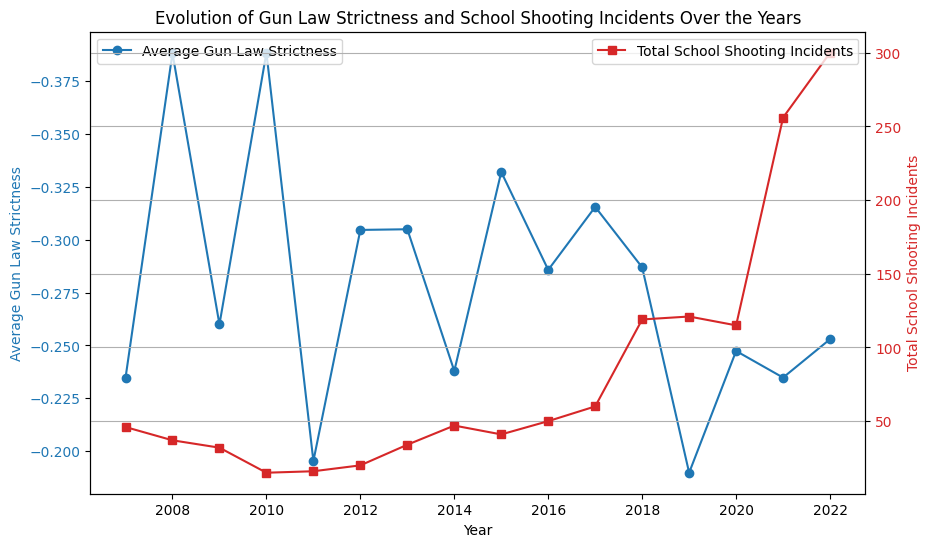

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

shooting_data_file = "/public v3 .csv"
law_data_file = "/State_Gun_law.csv"

# Load the dataframes with the correct delimiter
shooting_df = pd.read_csv(shooting_data_file, delimiter=';')
law_df = pd.read_csv(law_data_file, delimiter=';')

# Aggregate the number of incidents per state and year
incident_counts_yearly = shooting_df.groupby(['Year', 'State']).size().reset_index(name='incident_count')
law_years = [str(year) for year in range(2007, 2023)]
law_melted = law_df.melt(id_vars=['State', 'Abbreviation'], value_vars=law_years,
                         var_name='Year', value_name='Strictness')

# Convert Year and Strictness to numeric
law_melted['Year'] = pd.to_numeric(law_melted['Year'], errors='coerce')
law_melted['Strictness'] = pd.to_numeric(law_melted['Strictness'], errors='coerce')
merged_yearly_df = pd.merge(incident_counts_yearly, law_melted, left_on=['State', 'Year'], right_on=['Abbreviation', 'Year'])

# Group by year to get total incidents and average strictness
yearly_summary = merged_yearly_df.groupby('Year').agg({
    'incident_count': 'sum',
    'Strictness': 'mean'
}).reset_index()


fig, ax1 = plt.subplots(figsize=(10, 6))


color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Gun Law Strictness', color=color)
ax1.plot(yearly_summary['Year'], yearly_summary['Strictness'], marker='o', color=color, label='Average Gun Law Strictness')
ax1.tick_params(axis='y', labelcolor=color)
ax1.invert_yaxis()
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total School Shooting Incidents', color=color)
ax2.plot(yearly_summary['Year'], yearly_summary['incident_count'], marker='s', color=color, label='Total School Shooting Incidents')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Evolution of Gun Law Strictness and School Shooting Incidents Over the Years')
plt.grid(True)
plt.show()


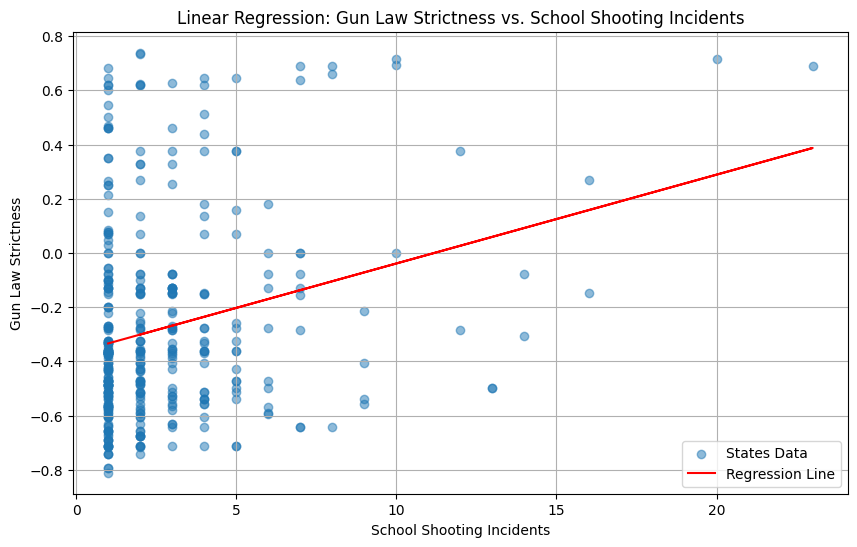

                            OLS Regression Results                            
Dep. Variable:             Strictness   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           2.90e-07
Time:                        14:48:07   Log-Likelihood:                -145.07
No. Observations:                 395   AIC:                             294.1
Df Residuals:                     393   BIC:                             302.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3667      0.024    -15.

In [8]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import statsmodels.api as sm


shooting_data_file = "/public v3 .csv"
law_data_file = "/State_Gun_law.csv"
shooting_df = pd.read_csv(shooting_data_file, delimiter=';')
law_df = pd.read_csv(law_data_file, delimiter=';')

incident_counts_yearly = shooting_df.groupby(['Year', 'State']).size().reset_index(name='incident_count')

law_years = [str(year) for year in range(2006, 2022)]
law_melted = law_df.melt(id_vars=['State', 'Abbreviation'], value_vars=law_years,
                         var_name='Year', value_name='Strictness')
law_melted['Year'] = pd.to_numeric(law_melted['Year'], errors='coerce')
law_melted['Strictness'] = pd.to_numeric(law_melted['Strictness'], errors='coerce')

merged_yearly_df = pd.merge(incident_counts_yearly, law_melted, left_on=['State', 'Year'], right_on=['Abbreviation', 'Year'])

# Scatter plot of all states over the years with regression line
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(merged_yearly_df['incident_count'], merged_yearly_df['Strictness'], alpha=0.5, label='States Data')

# Linear regression: Strictness ~ Incident Counts
X = merged_yearly_df['incident_count']
y = merged_yearly_df['Strictness']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot regression line
ax.plot(merged_yearly_df['incident_count'], predictions, color='red', label='Regression Line')

# Labels and title
ax.set_xlabel('School Shooting Incidents')
ax.set_ylabel('Gun Law Strictness')
ax.set_title('Linear Regression: Gun Law Strictness vs. School Shooting Incidents')
ax.legend()
ax.grid(True)

plt.show()

# Display regression summary
print(model.summary())
